In [332]:
# libraries

from sklearn.datasets import load_iris , make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score , silhouette_samples
%matplotlib inline
import numpy as np
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [263]:
from yellowbrick.cluster import SilhouetteVisualizer , silhouette_visualizer    
import PIL

In [264]:
plt.style.use('default')

In [265]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [266]:
x = iris.data
y = iris.target 

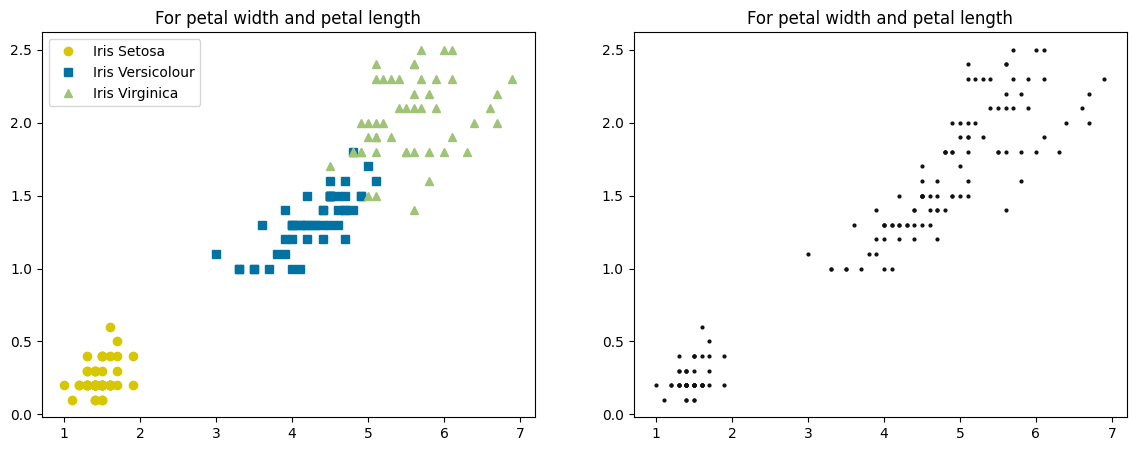

In [267]:
def plot_iris(x , y):

    fig , ax = plt.subplots(ncols = 2 , nrows=1 , figsize=(14 , 5))
    ax[0].plot(x[y == 0 , 2] , x[y == 0 , 3] , "yo" , label="Iris Setosa")
    ax[0].plot(x[y == 1 , 2] , x[y == 1 , 3] , "bs" , label="Iris Versicolour")
    ax[0].plot(x[y == 2 , 2] , x[y == 2 , 3] , "g^" , label="Iris Virginica")
    # ax[0].grid()
    ax[0].legend(loc="upper left")
    ax[0].set_title("For petal width and petal length")
    
    ax[1].scatter(x[: , 2] , x[: , 3] , c="k" , s=4)
    # ax[1].grid()
    ax[1].set_title("For petal width and petal length")
    
    
    plt.show()
    
    
plot_iris(x , y)

In [268]:
# k means clustering on the make blobs dataset

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
x, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

In [269]:
x.shape , y.shape

((2000, 2), (2000,))

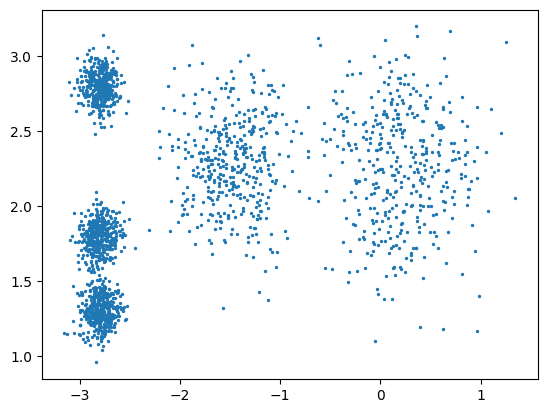

In [270]:
plt.scatter(x[: , 0] , x[: , 1] , s=2)
plt.show()

In [271]:
k = 5
kmeans = KMeans(n_clusters=k , n_init=50 , random_state=42)
y_pred = kmeans.fit_predict(x)

In [272]:
y_pred

array([0, 4, 1, ..., 3, 1, 4], shape=(2000,), dtype=int32)

In [273]:
# cluster center

kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

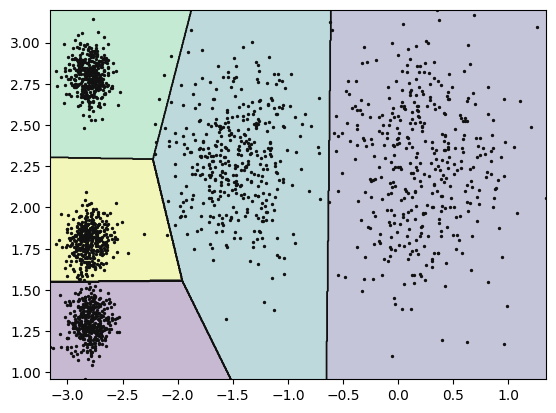

In [274]:
def decision_boundary(kmeans , x , y ):
    
    x1_new = np.linspace(x[: , 0].min() - 0.5 , x[: , 0].max() + 0.5 , 1000)
    x2_new = np.linspace(x[: , 1].min() - 0.5 , x[: , 1].max() + 0.5 , 1000)
    
    x_grid , y_grid = np.meshgrid(x1_new , x2_new)
    final_points = np.c_[x_grid.ravel() , y_grid.ravel()]
    
    y_pred = kmeans.predict(final_points).reshape(x_grid.shape)

    plt.contourf(x_grid , y_grid , y_pred , alpha=0.3, cmap="viridis")
    plt.contour(x_grid , y_grid , y_pred  , colors='k' , linewidths=1 )
    plt.scatter(x[: , 0] , x[: , 1] ,s=2 , c="k")
    plt.axis([x[: , 0].min() , x[: , 0].max() , x[: , 1].min() , x[: , 1].max()])
  
    

kmeans = KMeans(n_clusters=5 , n_init=13 ,  random_state=42)
kmeans.fit(x)
decision_boundary(kmeans , x ,y )


In [275]:
# above was eg of hard cluseting 

In [276]:
x1_new = np.linspace(x[: , 0].min() - 0.5 , x[: , 0].max() + 0.5 , 1000)
x2_new = np.linspace(x[: , 1].min() - 0.5 , x[: , 1].max() + 0.5 , 1000)

x_grid , y_grid = np.meshgrid(x1_new , x2_new)
final_points = np.c_[x_grid.ravel() , y_grid.ravel()]


# soft clustering mesure distance from each centroid

kmeans.transform(final_points).round(2)

array([[1.2 , 4.26, 2.85, 2.49, 1.59],
       [1.19, 4.25, 2.85, 2.49, 1.59],
       [1.19, 4.25, 2.84, 2.49, 1.58],
       ...,
       [5.22, 2.17, 3.59, 4.71, 5.01],
       [5.22, 2.18, 3.6 , 4.72, 5.02],
       [5.23, 2.18, 3.6 , 4.72, 5.02]], shape=(1000000, 5))

In [277]:
#centroid initialization methods 

# if you have previously trained a clustering algo then you can use its centeres
# use n_init
# kmeans compute the best centroid by using intertia , it chooses the lowest inertia

In [278]:
print(round(kmeans.inertia_ , 2))

211.6


In [279]:
kmeans_plus_plus = KMeans(n_clusters=5 , init = 'k-means++' , n_init=1)
kmeans_plus_plus.fit(x)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",1
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


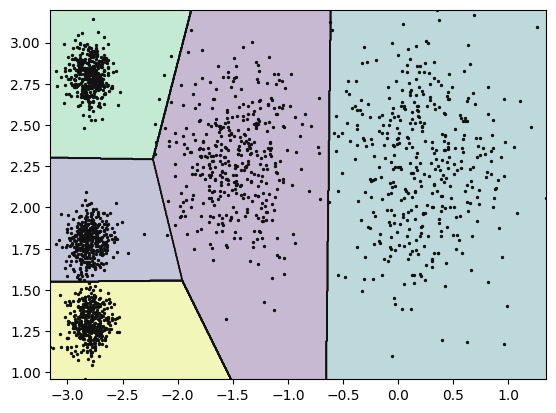

In [280]:
decision_boundary(kmeans_plus_plus , x , y)

#converged on first iteration damm

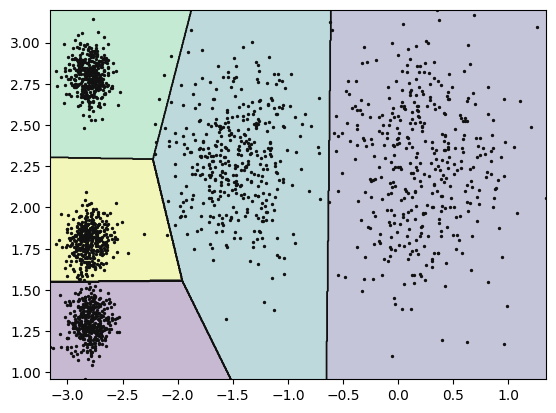

In [281]:
# elkan algo

kmeans_elkan = KMeans(n_clusters=5 , algorithm='elkan' , n_init=20 , random_state=42)
kmeans_elkan.fit(x)
decision_boundary(kmeans_elkan   , x , y)

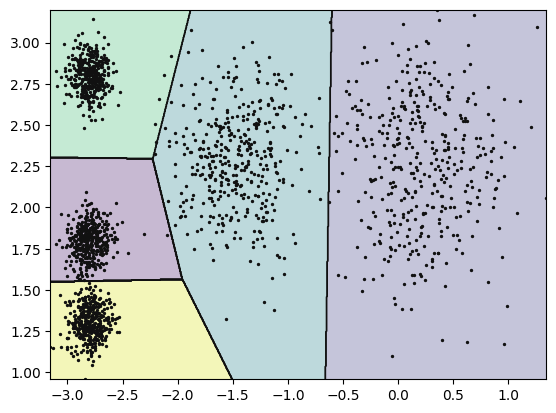

In [282]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5 , random_state=42)
minibatch_kmeans.fit(x)
decision_boundary(minibatch_kmeans , x , y)

In [283]:
# finding the right number of centroids 



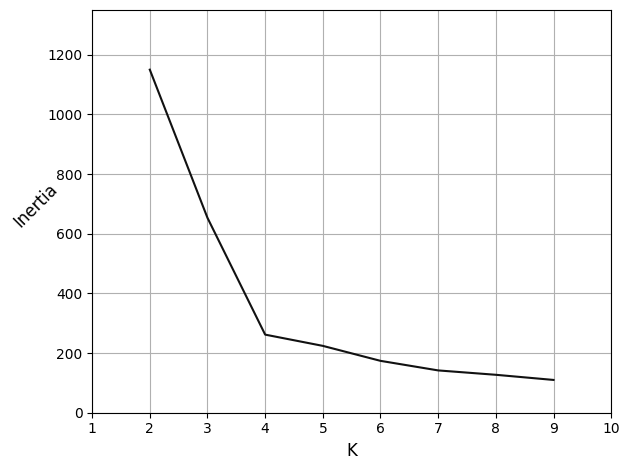

In [284]:
def plot_inetria_k(x):
    k = np.arange(2 , 10 , 1)
    inertia = []
    for cluster in k:
        kmeans = KMeans(n_clusters=cluster , random_state=42)
        kmeans.fit(x)
        inertia.append(kmeans.inertia_)
        
    plt.plot(k , np.array(inertia) , "k-")
    plt.xlabel("K" , fontsize=12)
    plt.ylabel("Inertia" , fontsize=12 , rotation=45)
    plt.grid()
    plt.axis([1 , 10 , 0 , max(inertia) + 200])
    plt.tight_layout()
    plt.show()
    
    
plot_inetria_k(x)

In [285]:
# silhouette score

In [286]:
silhouette_score(x , kmeans.labels_)

0.655517642572828

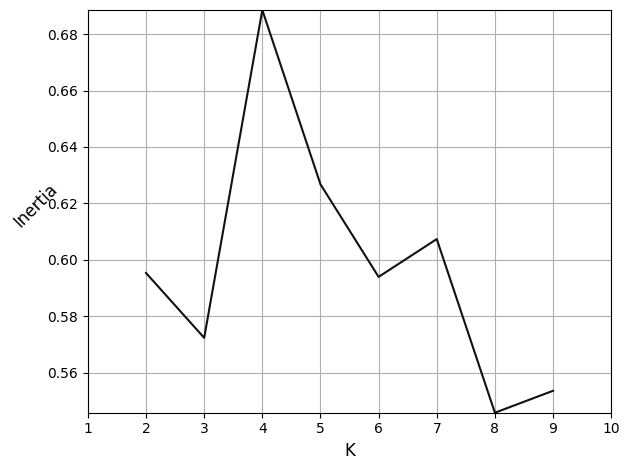

In [287]:
def plot_inetria_k(x):
    k = np.arange(2 , 10 , 1)
    score = []
    for cluster in k:
        kmeans = KMeans(n_clusters=cluster , random_state=42)
        kmeans.fit(x)
        score.append(silhouette_score(x , kmeans.labels_))
        
    plt.plot(k , np.array(score) , "k-")
    plt.xlabel("K" , fontsize=12)
    plt.ylabel("Inertia" , fontsize=12 , rotation=45)
    plt.grid()
    plt.axis([1 , 10 , min(score) , max(score)])
    plt.tight_layout()
    plt.show()
    
    
plot_inetria_k(x)

In [288]:
#shiloutte diagram 

k_means_per_k = [KMeans(n_clusters=k , random_state= 43).fit(x) 
                 for k in range(1,10)]


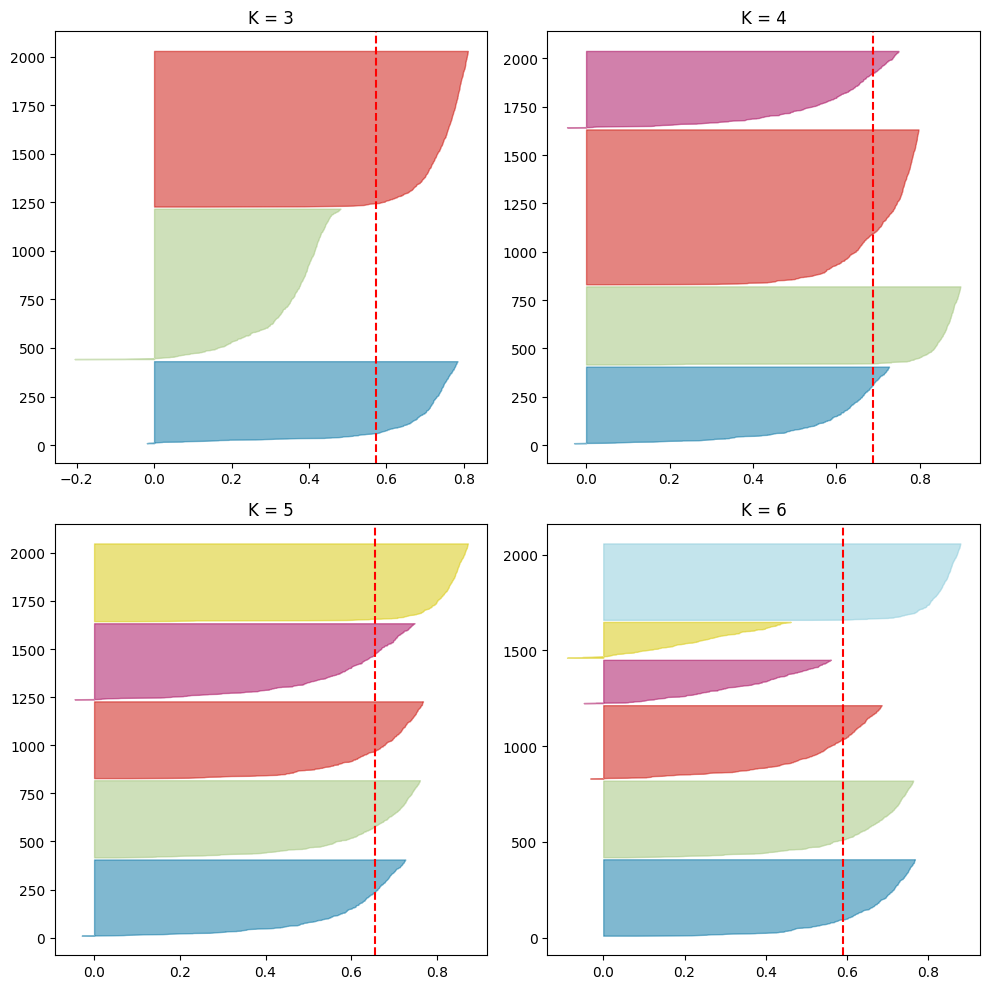

In [289]:

fig , ax = plt.subplots(2 , 2 , figsize=(10,10))
ax_flat = ax.flatten()
for i , k in enumerate([3 , 4 , 5 ,6]):
    model = KMeans(n_clusters= k , init="random" , random_state=42 , n_init=10)
    visualizer = SilhouetteVisualizer(model , colors='yellowbrick' , ax=ax_flat[i] , force_model = True)
    visualizer.fit(x)
    ax_flat[i].set_title(f"K = {k}")
    
plt.tight_layout()
plt.show()


In [290]:
# plt.figure(figsize=(11, 9))

# for k in (3, 4, 5, 6):
#     plt.subplot(2, 2, k - 2)
#     y_pred = k_means_per_k[k - 1].labels_
#     silhouette_coefficients = silhouette_samples(x, y_pred)

#     padding = len(x) // 30
#     pos = padding
#     ticks = []
#     for i in range(k):
#         coeffs = silhouette_coefficients[y_pred == i]
#         coeffs.sort()

#         color = plt.cm.Spectral(i / k)
#         plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
#                           facecolor=color, edgecolor=color, alpha=0.7)
#         ticks.append(pos + len(coeffs) // 2)
#         pos += len(coeffs) + padding

#     plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
#     plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
#     if k in (3, 5):
#         plt.ylabel("Cluster")

#     if k in (5, 6):
#         plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#         plt.xlabel("Silhouette Coefficient")
#     else:
#         plt.tick_params(labelbottom=False)

#     plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
#     plt.title(f"$k={k}$")


# plt.show()

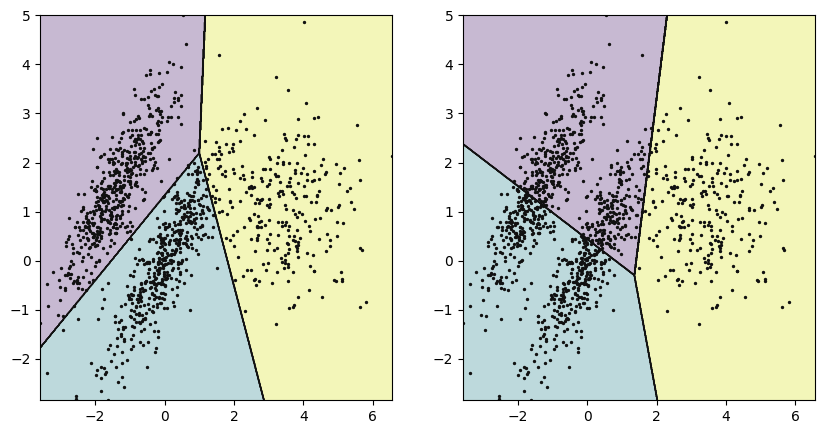

In [291]:
# for more complex data

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3 , init= np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     random_state=42)
kmeans_bad = KMeans(n_clusters= 3 , n_init= 10 , random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)


fig , ax = plt.subplots(1 , 2 , figsize=(10 , 5))
plt.sca(ax[0])
decision_boundary(kmeans_good , X , y)
plt.sca(ax[1])
decision_boundary(kmeans_bad , X , y)

In [292]:
#using clustering for image segmentation

In [304]:
from pathlib import Path
import urllib.request

homlp_root = "https://github.com/ageron/handson-mlp/raw/main/"
filename = "ladybug.png"
filepath = Path(f"my_{filename}")
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homlp_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [305]:
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

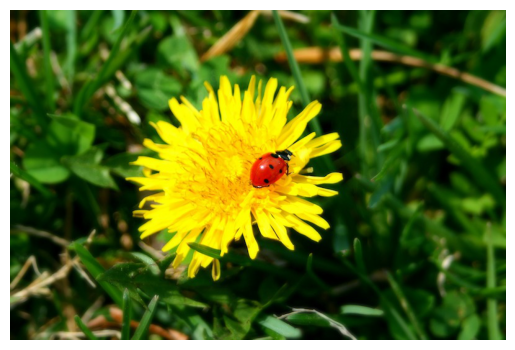

In [306]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [307]:
x = image.reshape(-1 , 3)
kmeans = KMeans(n_clusters= 8 , random_state=42).fit(x)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
segmented_img.shape

(533, 800, 3)

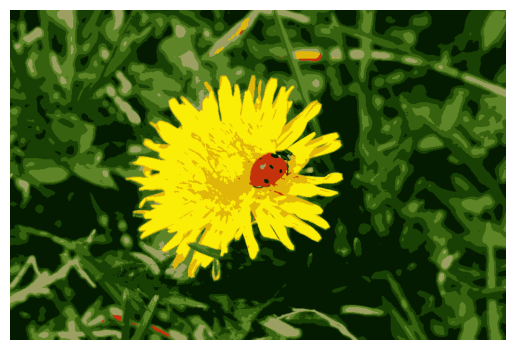

In [308]:
plt.imshow(segmented_img / 255)
plt.axis('off')
plt.show()

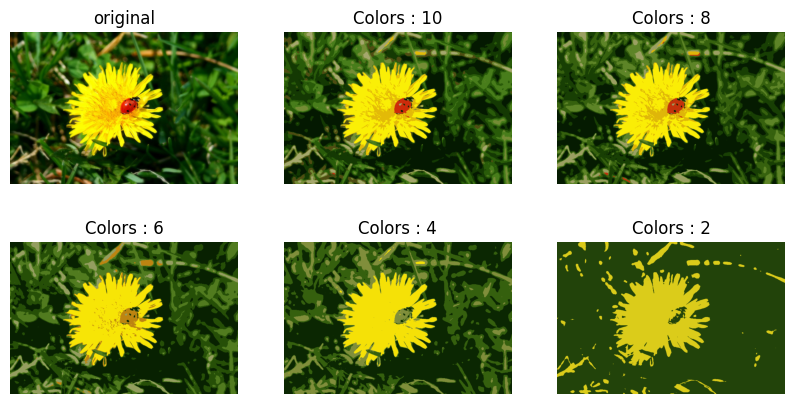

In [310]:
fig , ax = plt.subplots(2 , 3 , figsize=(10,5))
ax[0,0].imshow(image)
ax[0,0].set_title("original")
ax[0,0].grid()
ax[0,0].set_axis_off()

segmented_images = []
for cluster in [10 , 8 , 6 , 4 , 2]:
    kmeans = KMeans(n_clusters=  cluster , random_state=42).fit(x)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)
    segmented_images.append(segmented_img/255)
    
    
ax_flat = ax.flatten()
for index , (img, cluster) in enumerate(zip(segmented_images , [10 , 8 , 6 , 4 , 2])):
    ax_flat[index+1].imshow(img)
    ax_flat[index+1].set_axis_off()
    ax_flat[index+1].set_title(f"Colors : {cluster}")

    



In [311]:
#clustering for unsupervised learning 

In [314]:
x_digits , y_digits = load_digits(return_X_y=True)
x_digits.shape

(1797, 64)

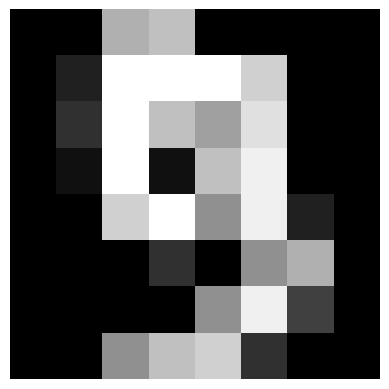

In [328]:
plt.imshow(x_digits[9 , :].reshape(8,8) , cmap="gray")
plt.axis('off')
plt.show()

In [334]:
x_train , y_train , x_test , y_test = x_digits[:1400] , y_digits[:1400] , x_digits[1400:] , y_digits[1400:]

In [335]:
# pretend we have labels for only 50 instances 
log_reg = LogisticRegression(max_iter=10_000 , random_state=42)
log_reg.fit(x_train[:50] , y_train[:50])


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [338]:
print(f"accuracy score : {accuracy_score(y_test , log_reg.predict(x_test)):.4f}")

accuracy score : 0.7582


In [339]:
k = 50
kmeans = KMeans(n_clusters=50 , random_state=42)
x_digits_dist = kmeans.fit_transform(x_train)
representatice_digit_idx = x_digits_dist.argmin(axis=0)
x_representative_digits = x_train[representatice_digit_idx]


x_representative_digits.shape

(50, 64)

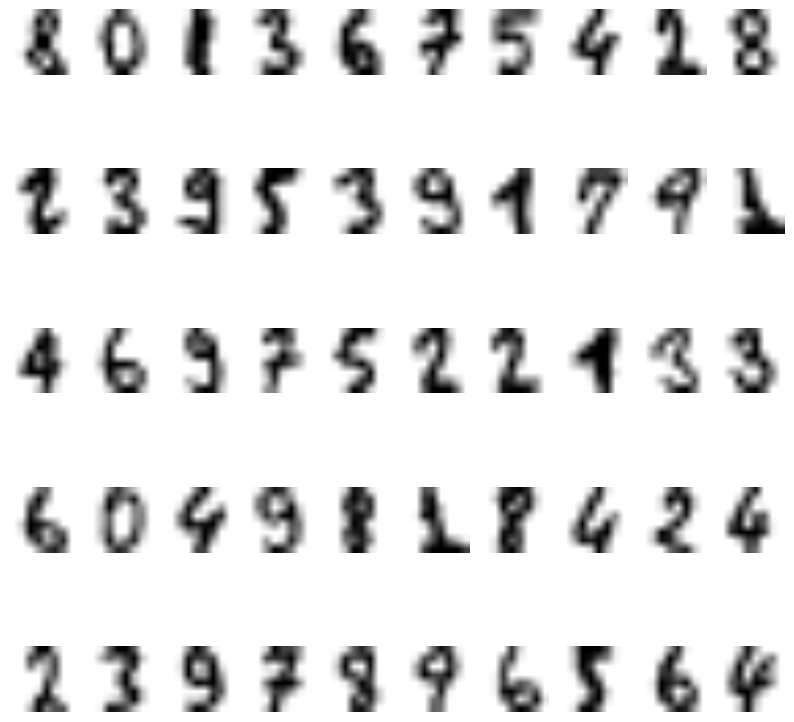

In [347]:
fig , ax = plt.subplots(5 , 10 , figsize=(10 , 10))
ax_flat = ax.flatten()

for index , image in enumerate(x_representative_digits):
    ax_flat[index].imshow(image.reshape(8,8) , cmap='binary' ,
                          interpolation='bilinear')
    ax_flat[index].set_axis_off()
     

In [348]:
y_representative_digits = np.array([
    8, 0, 1, 3, 6, 7, 5, 4, 2, 8,
    2, 3, 9, 5, 3, 9, 1, 7, 9, 1,
    4, 6, 9, 7, 5, 2, 2, 1, 3, 3,
    6, 0, 4, 9, 8, 1, 8, 4, 2, 4,
    2, 3, 9, 7, 8, 9, 6, 5, 6, 4,
])

In [349]:
# using representative images for training 

log_reg = LogisticRegression(max_iter= 10_000)
log_reg.fit(x_representative_digits , y_representative_digits)
log_reg.score(x_test , y_test)

0.8337531486146096

In [350]:
# propogate label to all the other instances in the same lcuster i.e. give them same label as the representative image of taht clsuter

In [352]:
y_train_propagated = np.empty(len(x_train) , dtype=np.int64)
for i in range(50):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [353]:
#now train 

log_reg = LogisticRegression(max_iter= 10_000 , random_state=42)
log_reg.fit(x_train , y_train_propagated)
log_reg.score(x_test , y_test)

0.8690176322418136